# Análise de Dados Eleitorais das Eleições Municipais de Pernmabuco de 2020

## Objetivos Primários

### Justificativa
O uso de um dataset contendo informações eleitorais estaduais é crucial para uma compreensão aprofundada do processo democrático, permitindo análises de tendências políticas, avaliações do desempenho político, promoção da transparência eleitoral e facilitação da pesquisa acadêmica. 
Esses dados fornecem insights valiosos sobre o comportamento dos eleitores, resultados eleitorais e dinâmicas políticas em nível estadual ao longo do tempo. 
Além disso, eles são essenciais para informar políticas, promover a participação cívica e fortalecer as instituições democráticas, contribuindo para uma sociedade mais informada, engajada e democrática.

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
# FONTE: https://dadosabertos.tse.jus.br/dataset/resultados-2020/resource/977f5f4a-8d03-4b3d-aaa5-00001b996f02

# LOAD dataset
df = pd.read_csv('votacao_secao_2020_PE.csv', encoding='latin1', sep=";")

In [126]:
# Configurações:
# mostrar todas as colunas, deixar a célula mostrar todas as linhas e todo comprimento da informação
pd.option_context('display.max_colwidth', None, 'display.max_columns', None, 'display.max_rows', None)

### Exploração Preliminar do Dataset

Exibe as colunas do Dataset e suas 5 primeiras linhas

In [127]:
df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO,NM_LOCAL_VOTACAO,DS_LOCAL_VOTACAO_ENDERECO
0,21/12/2020,16:55:14,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,62,13,Vereador,28999,FRANCISCO DE ASSIS SOUSA,1,1082,0,ESCOLA PARTICULAR IMACULADA CONCEIÇÃO,"R. COMANDANTE SUPERIOR, N. 841, N. SRA. PENHA"
1,21/12/2020,16:55:14,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,62,13,Vereador,40123,CICERO RAMON PEREIRA OLIVEIRA,2,1082,0,ESCOLA PARTICULAR IMACULADA CONCEIÇÃO,"R. COMANDANTE SUPERIOR, N. 841, N. SRA. PENHA"
2,21/12/2020,16:55:14,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,62,13,Vereador,40333,GILSON QUEIROZ RODRIGUES,2,1082,0,ESCOLA PARTICULAR IMACULADA CONCEIÇÃO,"R. COMANDANTE SUPERIOR, N. 841, N. SRA. PENHA"
3,21/12/2020,16:55:14,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,62,13,Vereador,40402,MARIA DO SOCORRO LIBERAL SIMÕES SILVA,1,1082,0,ESCOLA PARTICULAR IMACULADA CONCEIÇÃO,"R. COMANDANTE SUPERIOR, N. 841, N. SRA. PENHA"
4,21/12/2020,16:55:14,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,62,13,Vereador,51000,ANTÔNIO DIONÍZIO DA SILVA,3,1082,0,ESCOLA PARTICULAR IMACULADA CONCEIÇÃO,"R. COMANDANTE SUPERIOR, N. 841, N. SRA. PENHA"


Exibe informações sobre as colunas e os dados contidos no Dataset

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610335 entries, 0 to 1610334
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   DT_GERACAO                 1610335 non-null  object
 1   HH_GERACAO                 1610335 non-null  object
 2   ANO_ELEICAO                1610335 non-null  int64 
 3   CD_TIPO_ELEICAO            1610335 non-null  int64 
 4   NM_TIPO_ELEICAO            1610335 non-null  object
 5   NR_TURNO                   1610335 non-null  int64 
 6   CD_ELEICAO                 1610335 non-null  int64 
 7   DS_ELEICAO                 1610335 non-null  object
 8   DT_ELEICAO                 1610335 non-null  object
 9   TP_ABRANGENCIA             1610335 non-null  object
 10  SG_UF                      1610335 non-null  object
 11  SG_UE                      1610335 non-null  int64 
 12  NM_UE                      1610335 non-null  object
 13  CD_MUNICIPIO               

### Quantidade de Registros:
Exibição do número de linhas contidas no Dataset. df.shape[0] é responsável por retornar o número de linhas (registros) no DataFrame

In [129]:
num_registros = df.shape[0]
print("Quantidade de registros:", num_registros)

Quantidade de registros: 1610335


### Variáveis Disponíveis:

In [130]:
variaveis_disponiveis = df.columns.tolist()
print("Variáveis disponíveis:", variaveis_disponiveis)

Variáveis disponíveis: ['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO', 'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'CD_CARGO', 'DS_CARGO', 'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_LOCAL_VOTACAO', 'SQ_CANDIDATO', 'NM_LOCAL_VOTACAO', 'DS_LOCAL_VOTACAO_ENDERECO']


### Possíveis Lacunas nos Dados:

In [131]:
dados_nulos = df.isnull()
contagem_nulos = dados_nulos.sum()
print("Número de valores NULOS em cada coluna: \n", contagem_nulos)

Número de valores NULOS em cada coluna: 
 DT_GERACAO                   0
HH_GERACAO                   0
ANO_ELEICAO                  0
CD_TIPO_ELEICAO              0
NM_TIPO_ELEICAO              0
NR_TURNO                     0
CD_ELEICAO                   0
DS_ELEICAO                   0
DT_ELEICAO                   0
TP_ABRANGENCIA               0
SG_UF                        0
SG_UE                        0
NM_UE                        0
CD_MUNICIPIO                 0
NM_MUNICIPIO                 0
NR_ZONA                      0
NR_SECAO                     0
CD_CARGO                     0
DS_CARGO                     0
NR_VOTAVEL                   0
NM_VOTAVEL                   0
QT_VOTOS                     0
NR_LOCAL_VOTACAO             0
SQ_CANDIDATO                 0
NM_LOCAL_VOTACAO             0
DS_LOCAL_VOTACAO_ENDERECO    0
dtype: int64


In [132]:
dados_faltantes = df.isna()
contagem_faltantes = dados_faltantes.sum()
print("Número de valores FALTANTES em cada coluna: \n", contagem_faltantes)

Número de valores FALTANTES em cada coluna: 
 DT_GERACAO                   0
HH_GERACAO                   0
ANO_ELEICAO                  0
CD_TIPO_ELEICAO              0
NM_TIPO_ELEICAO              0
NR_TURNO                     0
CD_ELEICAO                   0
DS_ELEICAO                   0
DT_ELEICAO                   0
TP_ABRANGENCIA               0
SG_UF                        0
SG_UE                        0
NM_UE                        0
CD_MUNICIPIO                 0
NM_MUNICIPIO                 0
NR_ZONA                      0
NR_SECAO                     0
CD_CARGO                     0
DS_CARGO                     0
NR_VOTAVEL                   0
NM_VOTAVEL                   0
QT_VOTOS                     0
NR_LOCAL_VOTACAO             0
SQ_CANDIDATO                 0
NM_LOCAL_VOTACAO             0
DS_LOCAL_VOTACAO_ENDERECO    0
dtype: int64


Veirificar se existem linhas DUPLICADAS

In [133]:
duplicados = df.duplicated().sum()

print("Número de linhas DUPLICADAS: ", duplicados)


Número de linhas DUPLICADAS:  0


## Análise Exploratória

In [134]:
# Cidades com mais votos

# Somente para cargo de Vereador
df_vereador = df[df['DS_CARGO'] == 'Vereador']

# separa apenas municipios e quantidade de votos e agrupar por municípios
df_vereador_redu = df_vereador[['NM_MUNICIPIO', 'QT_VOTOS']]
df_ver_mun = df_vereador_redu.groupby('NM_MUNICIPIO').agg({'QT_VOTOS': 'sum'})

# adicionar porcentagem representando cada município em relação ao total (no Estado)
df_ver_mun['PORCENTAGEM'] = (df_ver_mun['QT_VOTOS'] / df_ver_mun['QT_VOTOS'].sum()) * 100

# ordenar por maior quantidade de votos
df_ver_mun = df_ver_mun.sort_values(by= 'QT_VOTOS', ascending=False)

# resetar o index
df_ver_mun_15 = df_ver_mun.head(15).reset_index()

# Letra Maiúsculas apenas na primeira letra
df_ver_mun_15['NM_MUNICIPIO'] = df_ver_mun_15['NM_MUNICIPIO'].str.capitalize()

df_ver_mun_15.head(15)


,NM_MUNICIPIO,QT_VOTOS,PORCENTAGEM
0,Recife,927167,16.878822
1,Jaboatão dos guararapes,348251,6.339814
2,Olinda,231439,4.213284
3,Caruaru,186633,3.397603
4,Paulista,176363,3.210640
5,Petrolina,170622,3.106127
6,Cabo de santo agostinho,130451,2.374825
7,Camaragibe,96469,1.756192
8,Vitória de santo antão,80788,1.470723
9,Garanhuns,71355,1.298998


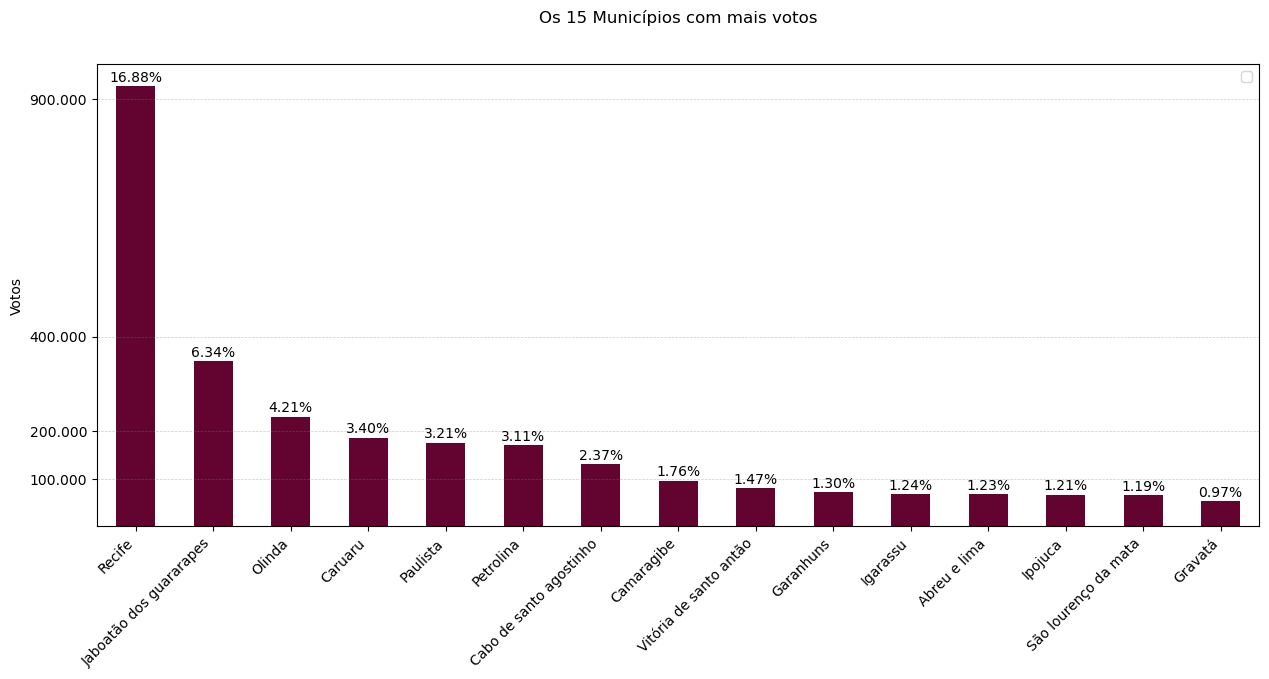

In [135]:
ax = df_ver_mun_15.plot(x='NM_MUNICIPIO', y='QT_VOTOS', kind='bar', figsize=(15, 6), color='#630330')

plt.xlabel('')
plt.ylabel('Votos')
plt.title('Os 15 Municípios com mais votos', pad=30)
plt.xticks(rotation=45, ha='right')
plt.yticks([100000, 200000, 400000, 900000], ['100.000', '200.000', '400.000', '900.000'])
plt.legend(labels=[])

for valor in [100000, 200000, 400000, 900000]:
    plt.axhline(y=valor, color='gray', linestyle='--', linewidth=0.5, alpha=0.4)

# Adicionar porcentagens no topo de cada barra
for i, barra in enumerate(ax.patches):
    altura = barra.get_height()
    porcentagem = df_ver_mun_15.loc[i, 'PORCENTAGEM']
    ax.text(barra.get_x() + barra.get_width() / 2, altura + 10000, f'{porcentagem:.2f}%', ha='center')

plt.show()

A concentração de Votantes em algumas cidades pode ser uma estratégia vinculada com as próprias eleições estaduais, possibilitando direcionamento de recursos para ser gasto com marketing e campanhas.

In [136]:
# Verificar Outliers

# Calcule o primeiro e o terceiro quartil
q1 = df_ver_mun['QT_VOTOS'].quantile(0.25)
q3 = df_ver_mun['QT_VOTOS'].quantile(0.75)

# Calcule o intervalo interquartil (IQR)
iqr = q3 - q1

# Determine os limites para identificar outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifique outliers
outliers = df_ver_mun[(df_ver_mun['QT_VOTOS'] < lower_bound) | (df_ver_mun['QT_VOTOS'] > upper_bound)]


outliers.reset_index(inplace=True)

print(outliers)

                NM_MUNICIPIO  QT_VOTOS  PORCENTAGEM
0                     RECIFE    927167    16.878822
1    JABOATÃO DOS GUARARAPES    348251     6.339814
2                     OLINDA    231439     4.213284
3                    CARUARU    186633     3.397603
4                   PAULISTA    176363     3.210640
5                  PETROLINA    170622     3.106127
6    CABO DE SANTO AGOSTINHO    130451     2.374825
7                 CAMARAGIBE     96469     1.756192
8     VITÓRIA DE SANTO ANTÃO     80788     1.470723
9                  GARANHUNS     71355     1.298998
10                  IGARASSU     67892     1.235955
11              ABREU E LIMA     67606     1.230749
12                   IPOJUCA     66637     1.213108
13      SÃO LOURENÇO DA MATA     65096     1.185055
14                   GRAVATÁ     53527     0.974444
15                    GOIANA     50150     0.912967
16  SANTA CRUZ DO CAPIBARIBE     49956     0.909435
17               BELO JARDIM     49227     0.896164
18          

In [137]:
total_de_municipios = len(df_vereador['NM_MUNICIPIO'].value_counts())
print("Número de municípios em Pernambuco: ", total_de_municipios)

Número de municípios em Pernambuco:  184


In [138]:
# Média de votantes em Pernambuco com Recife, sem Recife e sem os 'Outliers'
media_com_recife = df_vereador['QT_VOTOS'].sum() / total_de_municipios
print("Média de Votantes por Município considerando Recife: ", media_com_recife)


df_ver_sem_recife = df_vereador[df_vereador['NM_MUNICIPIO'] != "RECIFE"]
media_sem_recife = df_ver_sem_recife['QT_VOTOS'].sum() / (total_de_municipios -1)
print("Média de Votantes por Município SEM Recife: ", media_sem_recife)
df_ver_sem_recife_redu = df_ver_sem_recife[['NM_MUNICIPIO', 'QT_VOTOS']]
df_ver_sem_recife_redu = df_ver_sem_recife_redu.groupby(['NM_MUNICIPIO']).agg({'QT_VOTOS': 'sum'})
df_ver_sem_recife_redu = df_ver_sem_recife_redu.sort_values(by='QT_VOTOS', ascending=False)


list_outliers = outliers['NM_MUNICIPIO'].tolist()
df_sem_outliers = df_vereador[~df_vereador['NM_MUNICIPIO'].isin(list_outliers)]
media_sem_outliers = df_sem_outliers['QT_VOTOS'].sum() / (total_de_municipios - len(outliers))
print("Média de Votantes por Município SEM OUTLIERS: ", media_sem_outliers)
df_sem_outliers_redu = df_sem_outliers[['NM_MUNICIPIO', 'QT_VOTOS']]
df_sem_outliers_redu = df_sem_outliers_redu.groupby(['NM_MUNICIPIO']).agg({'QT_VOTOS': 'sum'})
df_sem_outliers_redu = df_sem_outliers_redu.sort_values(by='QT_VOTOS', ascending=False)

# tirar a porcentagem para comparar no gráfico

Média de Votantes por Município considerando Recife:  29853.690217391304
Média de Votantes por Município SEM Recife:  24950.33879781421
Média de Votantes por Município SEM OUTLIERS:  15114.730061349694


In [139]:

df_sem_outliers_redu_15 = df_sem_outliers_redu.head(15).reset_index()
df_sem_outliers_redu = df_sem_outliers_redu.head(100).reset_index()
df_ver_sem_recife_redu = df_ver_sem_recife_redu.head(100).reset_index()

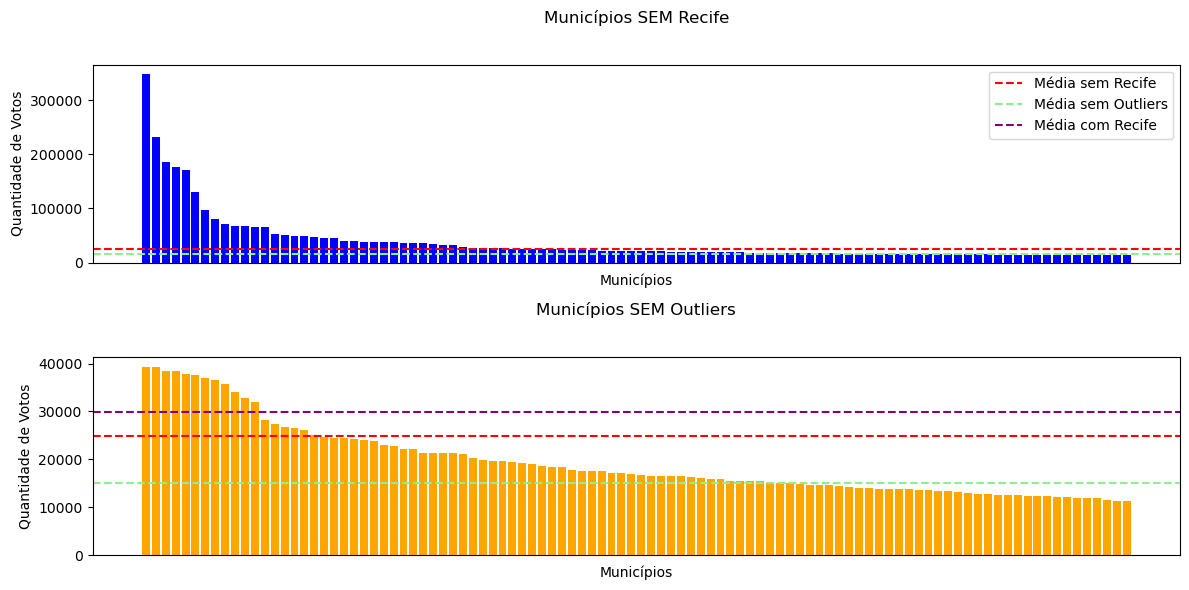

In [140]:
fig = plt.figure(figsize=(12, 6))

# Adicionando o primeiro subplot (gráfico de cima)
ax1 = fig.add_subplot(2, 1, 1)
ax1.bar(df_ver_sem_recife_redu['NM_MUNICIPIO'], df_ver_sem_recife_redu['QT_VOTOS'], color='blue')
ax1.set_title('Municípios SEM Recife', pad=30)
ax1.set_xlabel('Municípios')
ax1.set_ylabel('Quantidade de Votos')
ax1.tick_params(axis='x', rotation=90)
ax1.set_xticks([])  # Remover os ticks do eixo x
line1 = ax1.axhline(y=media_sem_recife, color='red', linestyle='--')
line2 = ax1.axhline(y=media_sem_outliers, color='lightgreen', linestyle='--')

# Adicionando o segundo subplot (gráfico de baixo)
ax2 = fig.add_subplot(2, 1, 2)
ax2.bar(df_sem_outliers_redu['NM_MUNICIPIO'], df_sem_outliers_redu['QT_VOTOS'], color='orange')
ax2.set_title('Municípios SEM Outliers', pad=30)
ax2.set_xlabel('Municípios')
ax2.set_ylabel('Quantidade de Votos')
ax2.tick_params(axis='x', rotation=90)
ax2.set_xticks([])  # Remover os ticks do eixo x
ax2.axhline(y=media_sem_recife, color='red', linestyle='--', label='Média sem Recife')
ax2.axhline(y=media_sem_outliers, color='lightgreen', linestyle='--', label='Média sem Outliers')
line3 = ax2.axhline(y=media_com_recife, color='purple', linestyle='--', label='Média com Recife')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Criando a legenda
handles, labels = ax1.get_legend_handles_labels()
handles.extend([line1, line2, line3])
labels.extend(['Média sem Recife', 'Média sem Outliers', 'Média com Recife'])
ax1.legend(handles, labels)

# Exibindo o gráfico
plt.show()

In [141]:
# Apenas dados do Recife
df_recife = df[df['NM_MUNICIPIO'] == 'RECIFE']

### Análise de votos para Prefeito

In [142]:
# Separa apenas para o cargo de Prefeito
df_pref_rec = df_recife[df_recife['DS_CARGO'] == 'Prefeito']

Renomear o nome dos Candidatos para melhorar a visualização

In [143]:
df_pref_rec['NM_VOTAVEL'].value_counts()

NM_VOTAVEL
MARILIA VALENÇA ROCHA ARRAES DE ALENCAR    5726
JOAO HENRIQUE DE ANDRADE LIMA CAMPOS       5726
VOTO BRANCO                                5726
VOTO NULO                                  5726
PATRICIA DE OLIVEIRA DOMINGOS              2863
JOSÉ MENDONÇA BEZERRA FILHO                2863
CARLOS ANTONIO GOMES DE ANDRADE LIMA       2793
ALBERTO JORGE DO NASCIMENTO FEITOSA        2634
CHARBEL ELIAS MAROUN                       1915
THIAGO DE OLIVEIRA SANTOS                   949
CLAUDIA MACHADO RIBEIRO                     921
MARCO AURELIO DE MEDEIROS LIMA              842
VICTOR ASSIS DA SILVA                        95
Name: count, dtype: int64

In [144]:
df_pref_rec.loc[df_pref_rec['NM_VOTAVEL'] == 'MARILIA VALENÇA ROCHA ARRAES DE ALENCAR', 'NM_VOTAVEL'] = 'Marília Arraes'
df_pref_rec.loc[df_pref_rec['NM_VOTAVEL'] == 'JOAO HENRIQUE DE ANDRADE LIMA CAMPOS', 'NM_VOTAVEL'] = 'João Campos'
df_pref_rec.loc[df_pref_rec['NM_VOTAVEL'] == 'VOTO BRANCO', 'NM_VOTAVEL'] = 'Voto Branco'
df_pref_rec.loc[df_pref_rec['NM_VOTAVEL'] == 'VOTO NULO', 'NM_VOTAVEL'] = 'Voto Nulo'
df_pref_rec.loc[df_pref_rec['NM_VOTAVEL'] == 'PATRICIA DE OLIVEIRA DOMINGOS', 'NM_VOTAVEL'] = 'Patrícia Domingos'
df_pref_rec.loc[df_pref_rec['NM_VOTAVEL'] == 'JOSÉ MENDONÇA BEZERRA FILHO', 'NM_VOTAVEL'] = 'Mendonça Filho'
df_pref_rec.loc[df_pref_rec['NM_VOTAVEL'] == 'CARLOS ANTONIO GOMES DE ANDRADE LIMA', 'NM_VOTAVEL'] = 'Carlos Gomes'
df_pref_rec.loc[df_pref_rec['NM_VOTAVEL'] == 'ALBERTO JORGE DO NASCIMENTO FEITOSA', 'NM_VOTAVEL'] = 'Alberto Feitosa'
df_pref_rec.loc[df_pref_rec['NM_VOTAVEL'] == 'CHARBEL ELIAS MAROUN', 'NM_VOTAVEL'] = 'Charbel Maroun'
df_pref_rec.loc[df_pref_rec['NM_VOTAVEL'] == 'THIAGO DE OLIVEIRA SANTOS', 'NM_VOTAVEL'] = 'Thiago Santos'
df_pref_rec.loc[df_pref_rec['NM_VOTAVEL'] == 'CLAUDIA MACHADO RIBEIRO', 'NM_VOTAVEL'] = 'Claudia Ribeiro'
df_pref_rec.loc[df_pref_rec['NM_VOTAVEL'] == 'MARCO AURELIO DE MEDEIROS LIMA', 'NM_VOTAVEL'] = 'Marco Aurélio'
df_pref_rec.loc[df_pref_rec['NM_VOTAVEL'] == 'VICTOR ASSIS DA SILVA', 'NM_VOTAVEL'] = 'Victor Assis'

#### Distinguir os votos do Primeiro e do Segundo Turno

In [145]:
pref_rec_turn_1 = df_pref_rec[df_pref_rec['NR_TURNO'] == 1]
total_votos_pref_rec_turn_1 = pref_rec_turn_1['QT_VOTOS'].sum()
print("Quantidade Total de Votos para Prefeito em Recife no PRIMEIRO turno: ", total_votos_pref_rec_turn_1)

pref_rec_turn_2 = df_pref_rec[df_pref_rec['NR_TURNO'] == 2]
total_votos_pref_rec_turn_2 = pref_rec_turn_2['QT_VOTOS'].sum()
print("Quantidade Total de Votos para Prefeito em Recife no SEGUNDO turno: ", total_votos_pref_rec_turn_2)

print("Diferença de votos entre os turnos (possíveis ausências): ", total_votos_pref_rec_turn_1 - total_votos_pref_rec_turn_2)


Quantidade Total de Votos para Prefeito em Recife no PRIMEIRO turno:  927167
Quantidade Total de Votos para Prefeito em Recife no SEGUNDO turno:  911314
Diferença de votos entre os turnos (possíveis ausências):  15853


#### Desempenho dos canditos à Prefeito no Primeiro Turno

In [146]:
soma_votos_por_candidato_pref = pref_rec_turn_1.groupby('NM_VOTAVEL')['QT_VOTOS'].sum()
soma_votos_por_candidato_ord_pref = soma_votos_por_candidato_pref.sort_values(ascending=False)

# print("Ordem dos Candidatos a Prefeito no Recife mais votados no PRIMEIRO turno: \n", soma_votos_por_candidato_ord_pref)

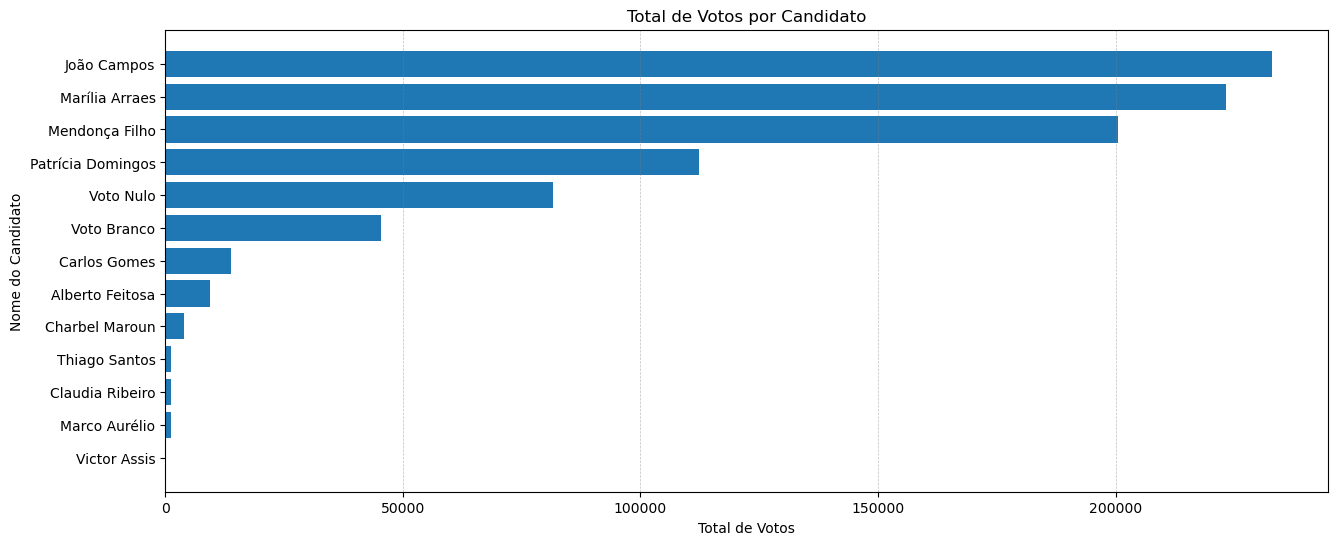

In [147]:
pref_rec_turn_1_redu = pref_rec_turn_1[['NM_VOTAVEL', 'QT_VOTOS']]

# Ordenar o DataFrame pela quantidade de votos em ordem decrescente
# pref_rec_turn_1_redu_sorted = pref_rec_turn_1_redu.sort_values(by='QT_VOTOS', ascending=False)

agregado = pref_rec_turn_1.groupby('NM_VOTAVEL')['QT_VOTOS'].sum()

agregado_ordenado = agregado.sort_values(ascending=True)

cores = {
    'Marília Arraes': '#FF0000',
    'João Campos': '#ffac47', 
    'Voto Branco': '#dcdcdc',
    'Voto Nulo': '#686868',
    'Patrícia Domingos': '#006666',
    'Mendonça Filho': '#4e73ff',
    'Alberto Feitosa': '#97ebdb',
    'Charbel Maroun': '#e8702a',
    'Thiago Santos': '#400000',
    'Claudia Ribeiro': '#400000',
    'Marco Aurélio': '#1a472a',
    'Victor Assis': '#a32020'
}

# Criar o gráfico de barras
plt.figure(figsize=(15, 6))  # Define o tamanho da figura
plt.barh(agregado_ordenado.index, agregado_ordenado)  # Cria o gráfico de barras com os eixos x e y invertidos
plt.xlabel('Total de Votos')  # Adiciona um rótulo ao eixo x
plt.ylabel('Nome do Candidato')  # Adiciona um rótulo ao eixo y
plt.title('Total de Votos por Candidato')  # Adiciona um título ao gráfico

# Adicionar linhas pontilhadas no eixo x para cada 50.000 votos
for i in range(50000, int(agregado.max()), 50000):
    plt.axvline(x=i, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)


plt.show()  # Mostra o gráfico

# TO DO: mudar cores de acordo com o candidato

#### Total de Votos Vs. Votos Válidos

In [148]:
# Reduzir o DataFrame para apenas duas colunas e somar os votos por candidato
pref_rec_turn_2_redu = pref_rec_turn_2[['NM_VOTAVEL', 'QT_VOTOS']]
pref_rec_turn_2_redu = pref_rec_turn_2_redu.groupby('NM_VOTAVEL').agg({'QT_VOTOS': 'sum'}).reset_index()

# Separar os votos válidos dos inválidos
pref_rec_turn_2_valid = pref_rec_turn_2_redu[~pref_rec_turn_2_redu['NM_VOTAVEL'].isin(['Voto Nulo', 'Voto Branco'])]


# Calcular a porcentagem dos votos para cada candidato sobre VOTOS TOTAIS e apenas os VOTOS VÁLIDOS
pref_rec_turn_2_redu['PORCENTAGEM'] = (pref_rec_turn_2_redu['QT_VOTOS'] / pref_rec_turn_2_redu['QT_VOTOS'].sum()) * 100
pref_rec_turn_2_valid['PORCENTAGEM'] = (pref_rec_turn_2_valid['QT_VOTOS'] / pref_rec_turn_2_valid['QT_VOTOS'].sum()) * 100


print("Todos os votos:")
print(pref_rec_turn_2_redu)

print("\nVotos válidos:")
print(pref_rec_turn_2_valid)

Todos os votos:
       NM_VOTAVEL  QT_VOTOS  PORCENTAGEM
0     João Campos    447913    49.150238
1  Marília Arraes    348126    38.200445
2     Voto Branco     31717     3.480359
3       Voto Nulo     83558     9.168958

Votos válidos:
       NM_VOTAVEL  QT_VOTOS  PORCENTAGEM
0     João Campos    447913    56.267721
1  Marília Arraes    348126    43.732279


C:\Users\guilhermevmmpg\AppData\Local\Temp\ipykernel_4276\99516438.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pref_rec_turn_2_valid['PORCENTAGEM'] = (pref_rec_turn_2_valid['QT_VOTOS'] / pref_rec_turn_2_valid['QT_VOTOS'].sum()) * 100


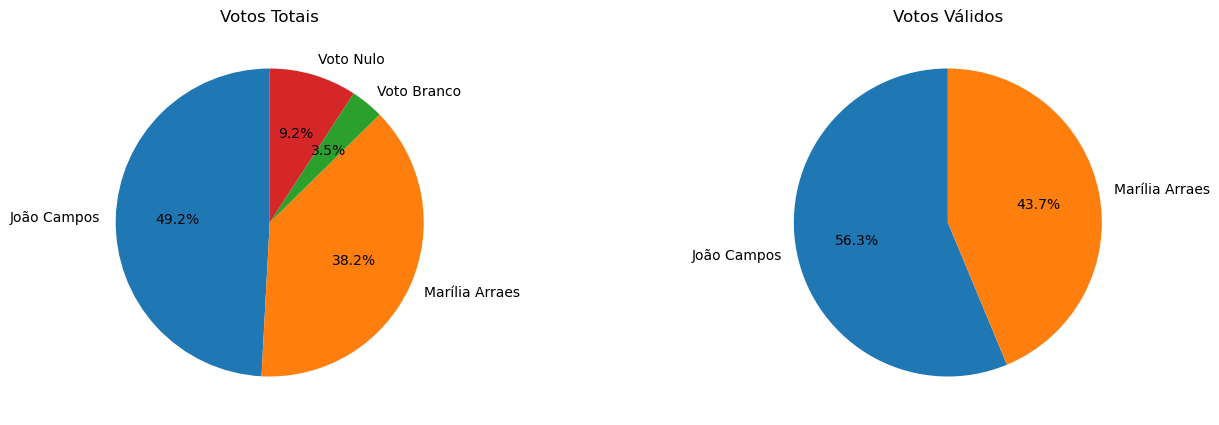

In [149]:

labels1 = pref_rec_turn_2_redu['NM_VOTAVEL']
sizes1 = pref_rec_turn_2_redu['QT_VOTOS']

labels2 = pref_rec_turn_2_valid['NM_VOTAVEL']
sizes2 = pref_rec_turn_2_valid['QT_VOTOS']

# Criar a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotar o primeiro gráfico de pizza
axs[0].pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Votos Totais')

# Plotar o segundo gráfico de pizza
axs[1].pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Votos Válidos')
plt.subplots_adjust(wspace=0.4)

plt.show()

Não é possível determinar um número preciso para ser eleito em primeiro turno pela necessidade de serem votos válidos (excluidos os brancos e nulos), ou seja, a quantidade de votos brancos e nulos vão influenciar na quantidade necessária para se atingir os 50% + 1 que vai permitir ultrapassar a metade dos votos no primeiro turno.

### Análise de votos para Vereador

In [150]:
# Somente para cargo de Vereador
df_rec_vereador = df_recife[df_recife['DS_CARGO'] == 'Vereador']

# separa apenas municipios e quantidade de votos e agrupar por municípios
df_rec_vereador_redu = df_rec_vereador[['NM_VOTAVEL', 'QT_VOTOS']]
df_ver_votaveis = df_rec_vereador_redu.groupby('NM_VOTAVEL').agg({'QT_VOTOS': 'sum'})

# adicionar porcentagem representando cada município em relação ao total (no Estado)
df_ver_votaveis['PORCENTAGEM'] = (df_ver_votaveis['QT_VOTOS'] / df_ver_votaveis['QT_VOTOS'].sum()) * 100

# ordenar por maior quantidade de votos
df_ver_votaveis_order = df_ver_votaveis.sort_values(by= 'QT_VOTOS', ascending=False)

# resetar o index
df_ver_votaveis_redu = df_ver_votaveis_order.head(15).reset_index()

# Letra Maiúsculas apenas na primeira letra
df_ver_votaveis_redu['NM_VOTAVEL'] = df_ver_votaveis_redu['NM_VOTAVEL'].str.capitalize()

print(df_ver_votaveis_redu)

                                    NM_VOTAVEL  QT_VOTOS  PORCENTAGEM
0                                    Voto nulo     63639     6.863812
1                                  Voto branco     48760     5.259031
2                Partido socialista brasileiro     14169     1.528204
3                      Danielle gondim portela     14114     1.522272
4   Andreza bandeira ferreira de oliveira melo     13249     1.428977
5                Jose ivanildo de moura junior     12207     1.316591
6                       Rafael acioli medeiros     11938     1.287578
7                Romero jatobá cavalcanti neto     11500     1.240338
8                          Davi bernardo muniz     10498     1.132266
9                    Helio batista de oliveira     10393     1.120942
10                   Partido dos trabalhadores     10358     1.117167
11              Aderaldo de oliveira florêncio     10062     1.085241
12       Luiz felipe câmara de oliveira pontes     10037     1.082545
13           Francis

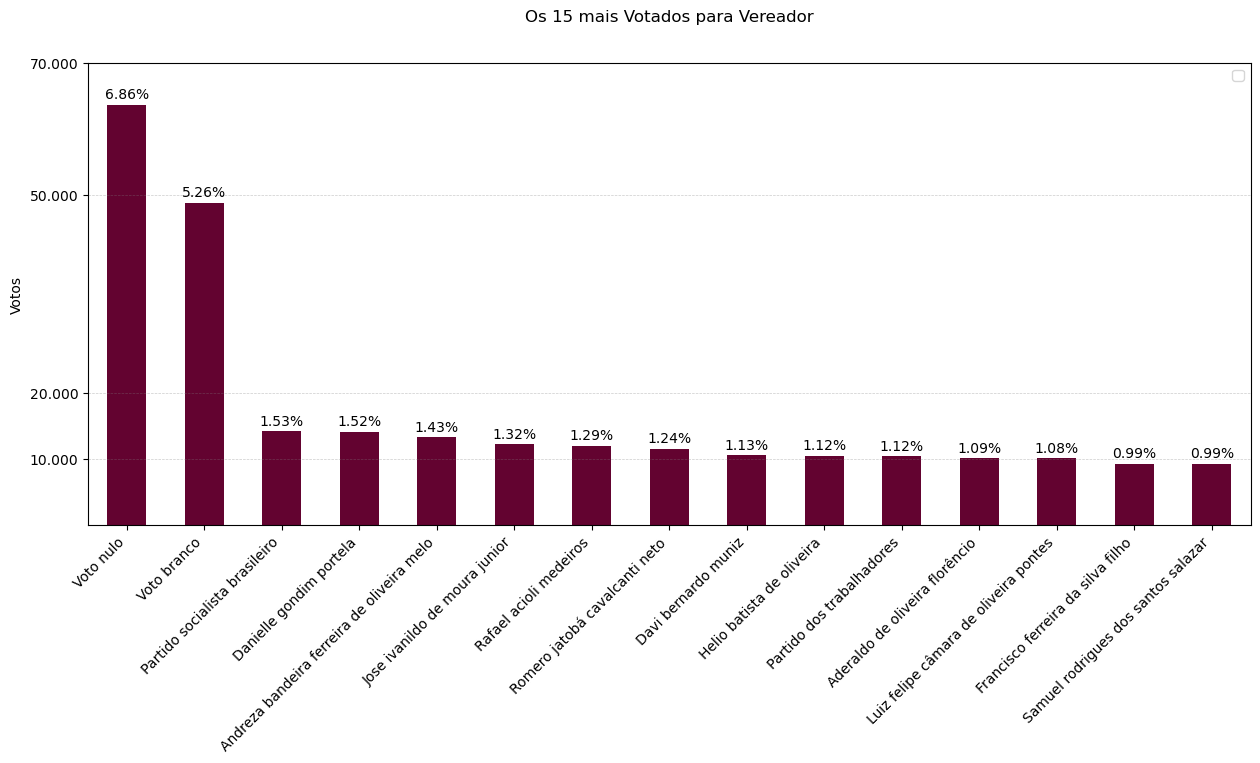

In [151]:
ax = df_ver_votaveis_redu.plot(x='NM_VOTAVEL', y='QT_VOTOS', kind='bar', figsize=(15, 6), color='#630330')

plt.xlabel('')
plt.ylabel('Votos')
plt.title('Os 15 mais Votados para Vereador', pad=30)
plt.xticks(rotation=45, ha='right')
plt.yticks([10000, 20000, 50000, 70000], ['10.000', '20.000', '50.000', '70.000'])
plt.legend(labels=[])

for valor in [10000, 20000, 50000, 70000]:
    plt.axhline(y=valor, color='gray', linestyle='--', linewidth=0.5, alpha=0.4)

# Adicionar porcentagens no topo de cada barra
for i, barra in enumerate(ax.patches):
    altura = barra.get_height()
    porcentagem = df_ver_votaveis_redu.loc[i, 'PORCENTAGEM']
    ax.text(barra.get_x() + barra.get_width() / 2, altura + 1000, f'{porcentagem:.2f}%', ha='center')

plt.show()

In [152]:
# Somente VOTOS VÁLIDOS

# separa apenas municipios e quantidade de votos e agrupar por municípios
df_rec_vereador_redu = df_rec_vereador[['NM_VOTAVEL', 'QT_VOTOS']]

# Separar os votos válidos dos inválidos
df_rec_vereador_redu = df_rec_vereador_redu[~df_rec_vereador_redu['NM_VOTAVEL'].isin(['VOTO NULO', 'VOTO BRANCO'])]

df_ver_votaveis = df_rec_vereador_redu.groupby('NM_VOTAVEL').agg({'QT_VOTOS': 'sum'})

# adicionar porcentagem representando cada município em relação ao total (no Estado)
df_ver_votaveis['PORCENTAGEM'] = (df_ver_votaveis['QT_VOTOS'] / df_ver_votaveis['QT_VOTOS'].sum()) * 100

# ordenar por maior quantidade de votos
df_ver_votaveis_order = df_ver_votaveis.sort_values(by= 'QT_VOTOS', ascending=False)

# resetar o index
df_ver_votaveis_redu = df_ver_votaveis_order.head(15).reset_index()

# Letra Maiúsculas apenas na primeira letra
df_ver_votaveis_redu['NM_VOTAVEL'] = df_ver_votaveis_redu['NM_VOTAVEL'].str.capitalize()

print("\nVotos válidos:")
print(df_ver_votaveis_redu)


Votos válidos:
                                    NM_VOTAVEL  QT_VOTOS  PORCENTAGEM
0                Partido socialista brasileiro     14169     1.739023
1                      Danielle gondim portela     14114     1.732272
2   Andreza bandeira ferreira de oliveira melo     13249     1.626107
3                Jose ivanildo de moura junior     12207     1.498218
4                       Rafael acioli medeiros     11938     1.465202
5                Romero jatobá cavalcanti neto     11500     1.411445
6                          Davi bernardo muniz     10498     1.288465
7                    Helio batista de oliveira     10393     1.275578
8                    Partido dos trabalhadores     10358     1.271282
9               Aderaldo de oliveira florêncio     10062     1.234953
10       Luiz felipe câmara de oliveira pontes     10037     1.231884
11           Francisco ferreira da silva filho      9194     1.128419
12         Samuel rodrigues dos santos salazar      9188     1.127683
13  

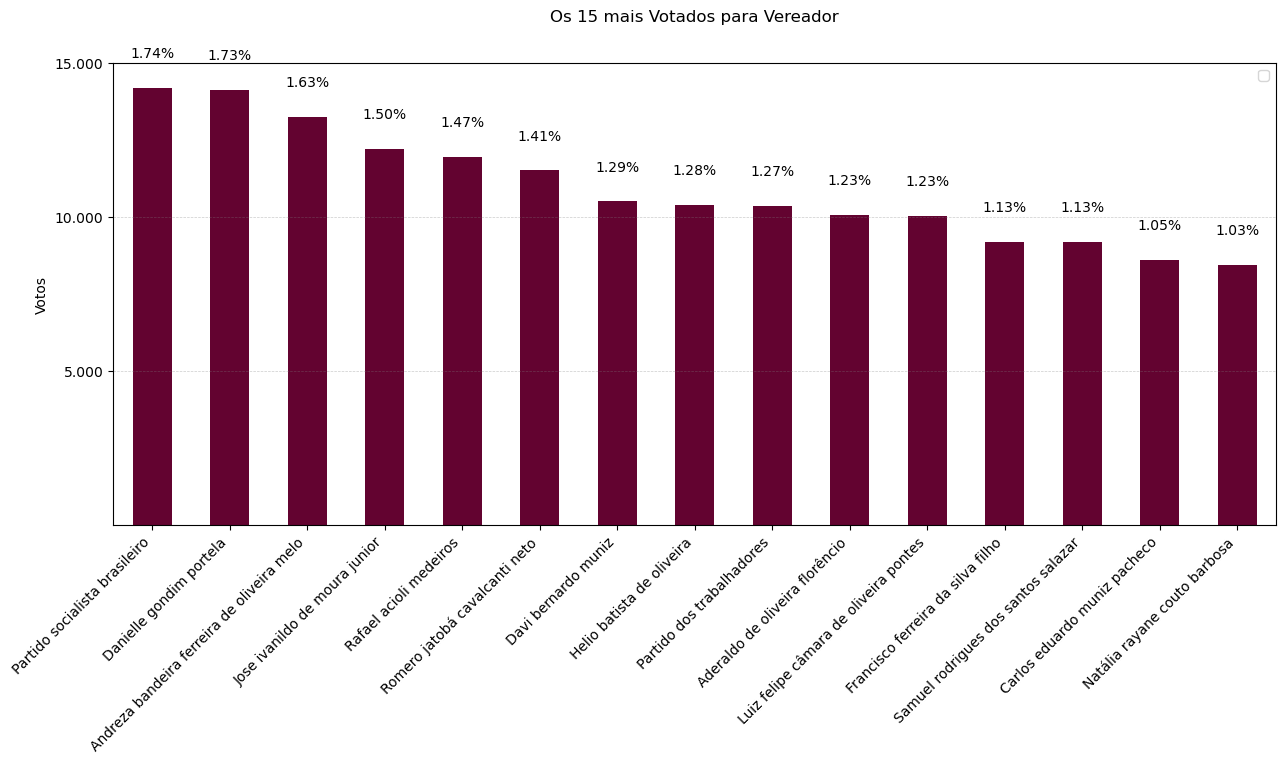

In [153]:
ax = df_ver_votaveis_redu.plot(x='NM_VOTAVEL', y='QT_VOTOS', kind='bar', figsize=(15, 6), color='#630330')

plt.xlabel('')
plt.ylabel('Votos')
plt.title('Os 15 mais Votados para Vereador', pad=30)
plt.xticks(rotation=45, ha='right')
plt.yticks([5000, 10000, 15000], ['5.000', '10.000', '15.000'])
plt.legend(labels=[])

for valor in [5000, 10000, 15000]:
    plt.axhline(y=valor, color='gray', linestyle='--', linewidth=0.5, alpha=0.4)

# Adicionar porcentagens no topo de cada barra
for i, barra in enumerate(ax.patches):
    altura = barra.get_height()
    porcentagem = df_ver_votaveis_redu.loc[i, 'PORCENTAGEM']
    ax.text(barra.get_x() + barra.get_width() / 2, altura + 1000, f'{porcentagem:.2f}%', ha='center')

plt.show()

Para a eleição de Vereadores adota-se o **sistema proporcional** de votação, também utilizado para eleição de Deputados Estaduais e Federais.

Para a eleição para prefeituras, governadores, Senado e Presidência adota-se o **sistema majoritário** em que aquele ou aquela que recebeu mais votos se elege.

O sistema proporcional, por outro lado, visa priorizar as legendas (os partidos político).
Ou seja, visa priorizar a agregação ideológica em detrimento de uma figura particular.

Um exemplo da diferença causada pelo sistema proporcional em relação ao majoritário foi nas eleições de 2012 para vereador no Recife, em que um candito foi o 3º mais votado e ainda assim não foi eleito.

Isso ocorre pelo **quociente eleitoral** que é o número de votos válidos para determinado cargo dividido pelo número de vagas a preencher para determinado cargo.

Por outro lado, o **quociente partidário** que define o número de vagas que cada partido tem direito, que é o resultado do número de votos válidos para determinado partido ou federação dividido pelo quociente eleitoral.

In [154]:
# Vereadores mais votados dos 15 Municípios com mais votos

# Separar os votos válidos dos inválidos
df_vereador_valid = df_vereador[~df_vereador['NM_VOTAVEL'].isin(['VOTO NULO', 'VOTO BRANCO'])]

# Excluir votos em Legenda
df_vereador_valid = df_vereador_valid[~df_vereador_valid['NM_VOTAVEL'].isin(['Partido Socialista Brasileiro', 
                                                                 'Partido da Social Democracia Brasileira',
                                                                 'Partido Liberal',
                                                                 'Movimento Democrático Brasileiro'])]

vereadores_por_municipios = df_vereador_valid.groupby(['NM_MUNICIPIO', 'NM_VOTAVEL'])['QT_VOTOS'].sum()

candidatos_mais_votados_por_municipio = vereadores_por_municipios.groupby('NM_MUNICIPIO').idxmax()

soma_votos_por_municipio = vereadores_por_municipios.groupby('NM_MUNICIPIO').sum()

soma_votos_por_municipio_sorted = soma_votos_por_municipio.sort_values(ascending=False)

# Criar um DataFrame vazio para armazenar os resultados
resultados_df = pd.DataFrame(columns=['Municipio', 'Candidato_Mais_Votado', 'Total_Votos'])

# Iterar sobre os municípios
for municipio in soma_votos_por_municipio_sorted.index:
    idx = candidatos_mais_votados_por_municipio.loc[municipio]
    candidato_mais_votado = idx[1] 
    votos_candidato_mais_votado = vereadores_por_municipios.loc[(municipio, candidato_mais_votado)]
    
    # Adicionar os resultados como uma nova linha no DataFrame usando loc[]
    resultados_df.loc[len(resultados_df)] = [municipio, candidato_mais_votado, votos_candidato_mais_votado]

# Exibir o DataFrame final
resultados_df = resultados_df.sort_values( by='Total_Votos', ascending=False)
resultados_df.head(15)

,Municipio,Candidato_Mais_Votado,Total_Votos
0,RECIFE,DANIELLE GONDIM PORTELA,14114
2,OLINDA,SAULO HOLANDA RABELO DE OLIVEIRA,5046
4,PAULISTA,IOLANDA MARIA DA SILVA,3826
1,JABOATÃO DOS GUARARAPES,MARLUS DE ARAUJO COSTA,3796
5,PETROLINA,MANOEL ANTONIO COELHO NETO,3755
8,VITÓRIA DE SANTO ANTÃO,ANDRÉ CARVALHO DE MOURA,3692
3,CARUARU,MARIA PERPÉTUA SOCORRO DANTAS,3200
10,IPOJUCA,PAULO HENRIQUE GONÇALVES BEZERRA,2766
19,ARARIPINA,KALIGIA CARVALHO MOREIRA MATEUS,2447
12,ABREU E LIMA,CÍCERO ZEFERINO DE ANDRADE,2401


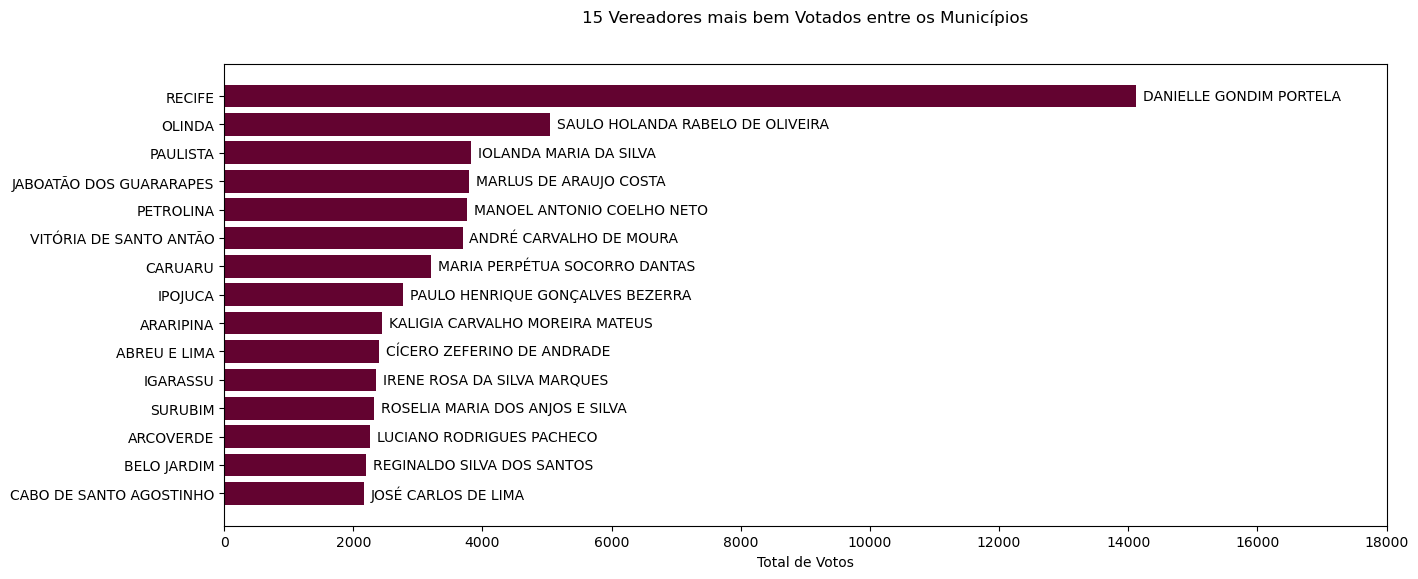

In [155]:
# Ordenar o DataFrame em ordem decrescente pelo total de votos
resultados_df_sorted = resultados_df.sort_values(by='Total_Votos', ascending=False)

# Selecionar os 15 primeiros elementos do DataFrame ordenado
top_15 = resultados_df_sorted.head(15)

# Criar o gráfico de barras
plt.figure(figsize=(15, 6))
bars = plt.barh(top_15['Municipio'], top_15['Total_Votos'], color='#630330')

# Adicionar o nome do candidato mais votado ao final de cada barra
for bar, candidato in zip(bars, top_15['Candidato_Mais_Votado']):
    plt.annotate(candidato, xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.xlabel('Total de Votos')
plt.title('15 Vereadores mais bem Votados entre os Municípios', pad=30)

# Definir o limite do eixo x até 18000
plt.xlim(0, 18000)

# Inverter a ordem do eixo y
plt.gca().invert_yaxis()

plt.show()
